In [1]:
import json
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import glob

In [2]:
ROOT_DIR=os.path.abspath('')
RESULTS_DIR = os.path.join(ROOT_DIR, "results")
FIGURES_DIR = os.path.join(ROOT_DIR, "figures")

In [3]:
RESULTS_DIR

'/home/ch225336/AgePrediction/results'

In [4]:
job_ids = ['2016820','2016821','2014633']
job_ids

['2016820', '2016821', '2014633']

In [5]:
titles=["FIQ(60 slices)","VIQ(150 slices)","PIQ(100 slices)"]

In [6]:
df=pd.read_csv(f"{RESULTS_DIR}/1986621/best_model_val_preds_f1.csv")

In [7]:
df

,id,iq,sex,path,iqbin,age_pred
0,51458,93.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,93.0,106.005326
1,51459,106.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,106.0,106.135503
2,51465,96.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,96.0,106.571577
3,51474,100.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,100.0,106.122527
4,51475,104.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,104.0,106.381000
...,...,...,...,...,...,...
172,50574,91.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,91.0,110.397034
173,50601,102.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,102.0,109.276944
174,50605,121.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,121.0,106.310136
175,50608,100.0,M,/neuro/labs/grantlab/research/MRI_Predict_Age/...,100.0,109.334904


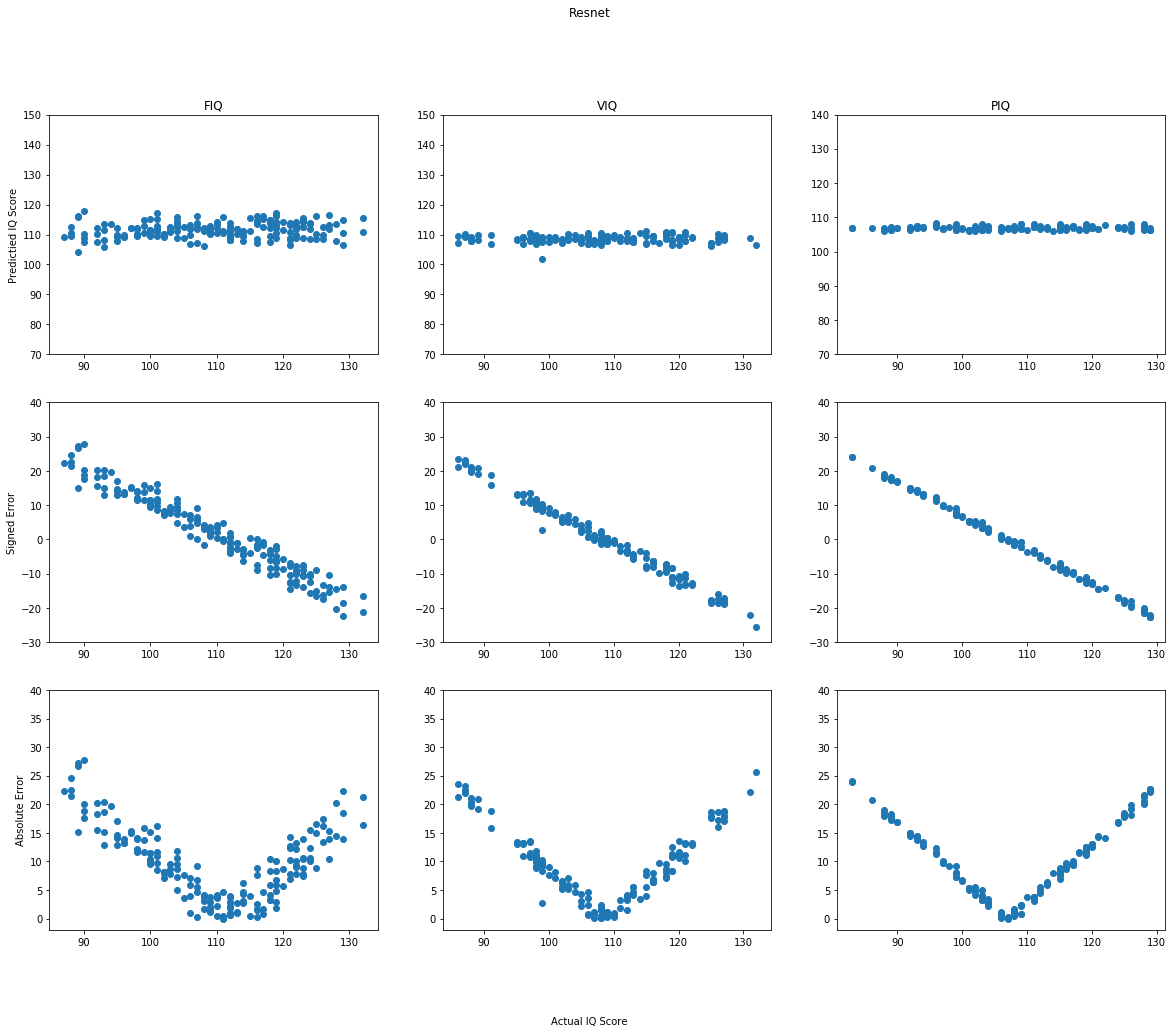

In [12]:
fig,ax=plt.subplots(3,3,figsize=(20,15))
for i in range(0,3):
    val_preds = pd.read_csv(f"{RESULTS_DIR}/{job_ids[i]}/best_model_val_preds_f5.csv")
    ax[0,i].set_title(titles[i])
    ax[0,i].scatter(val_preds["iq"],val_preds["age_pred"])
    ax[1,i].scatter(val_preds["iq"],val_preds["age_pred"]-val_preds["iq"])
    ax[1,i].set_ylim(-30,40)
    ax[2,i].scatter(val_preds["iq"],abs(val_preds["age_pred"]-val_preds["iq"]))
    ax[2,i].set_ylim(-2,40)
ax[0,0].set_ylim(70,150)
ax[0,2].set_ylim(70,140)
ax[0,1].set_ylim(70,150)

for axes, row in zip(ax[:,0], ['Predictied IQ Score', 'Signed Error', 'Absolute Error'] ):
    axes.set_ylabel(row,size=10)

fig.text(0.5, 0.04, 'Actual IQ Score', ha='center', va='center')
fig.suptitle('Resnet')
#plt.savefig(os.path.join(FIGURES_DIR,f"3x3_resnet_intensity_fold1.png"))  
plt.show()

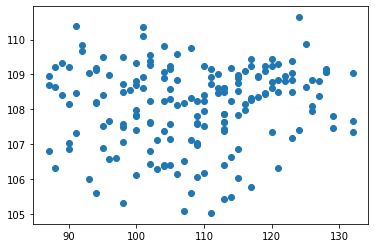

In [29]:
plt.scatter(df["iq"],df["age_pred"])


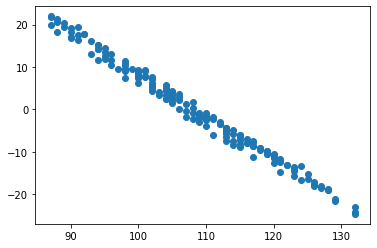

In [30]:
plt.scatter(df["iq"],df["age_pred"]-df["iq"])

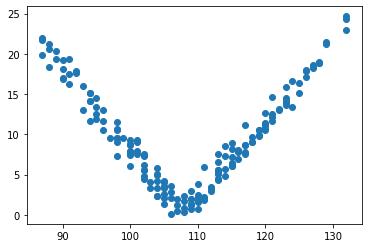

In [31]:
plt.scatter(df["iq"],abs(df["age_pred"]-df["iq"]))

In [17]:
for i in range(0,3):
    val_preds = pd.concat(map(pd.read_csv,glob.glob(os.path.join(f"{RESULTS_DIR}/{job_ids[i]}/*.csv"))))
    mae = np.mean(val_preds["age_pred"]-val_preds["iq"])
    me = np.mean(abs(val_preds["age_pred"]-val_preds["iq"]))
    print(mae)
    print(me)

0.40167342910123927
9.233502515835607
-1.107634325292346
9.317658650477046
1.0422639484817158
9.206510537959822


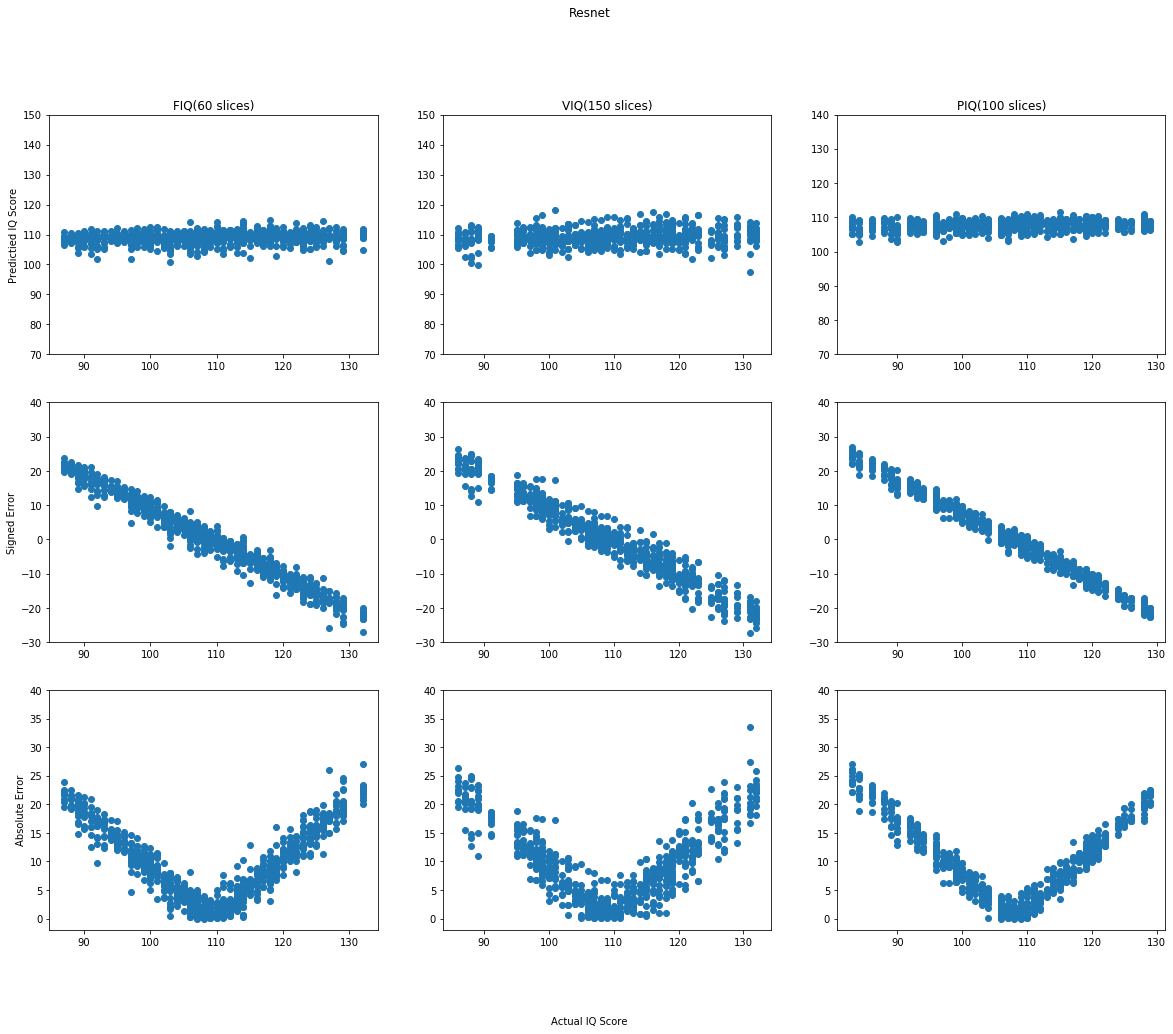

In [6]:
fig,ax=plt.subplots(3,3,figsize=(20,15))
for i in range(0,3):
    val_preds = pd.concat(map(pd.read_csv,glob.glob(os.path.join(f"{RESULTS_DIR}/{job_ids[i]}/*.csv"))))
    ax[0,i].set_title(titles[i])
    ax[0,i].scatter(val_preds["iq"],val_preds["age_pred"])
    ax[1,i].scatter(val_preds["iq"],val_preds["age_pred"]-val_preds["iq"])
    ax[1,i].set_ylim(-30,40)
    ax[2,i].scatter(val_preds["iq"],abs(val_preds["age_pred"]-val_preds["iq"]))
    ax[2,i].set_ylim(-2,40)
ax[0,0].set_ylim(70,150)
ax[0,2].set_ylim(70,140)
ax[0,1].set_ylim(70,150)

for axes, row in zip(ax[:,0], ['Predictied IQ Score', 'Signed Error', 'Absolute Error'] ):
    axes.set_ylabel(row,size=10)

fig.text(0.5, 0.04, 'Actual IQ Score', ha='center', va='center')
fig.suptitle('Resnet')
plt.savefig(os.path.join(FIGURES_DIR,f"3x3_resnet_slices_all.png"))  
plt.show()

In [20]:
job_ids=['1986629','1986637','1986631']

<Figure size 432x288 with 0 Axes>

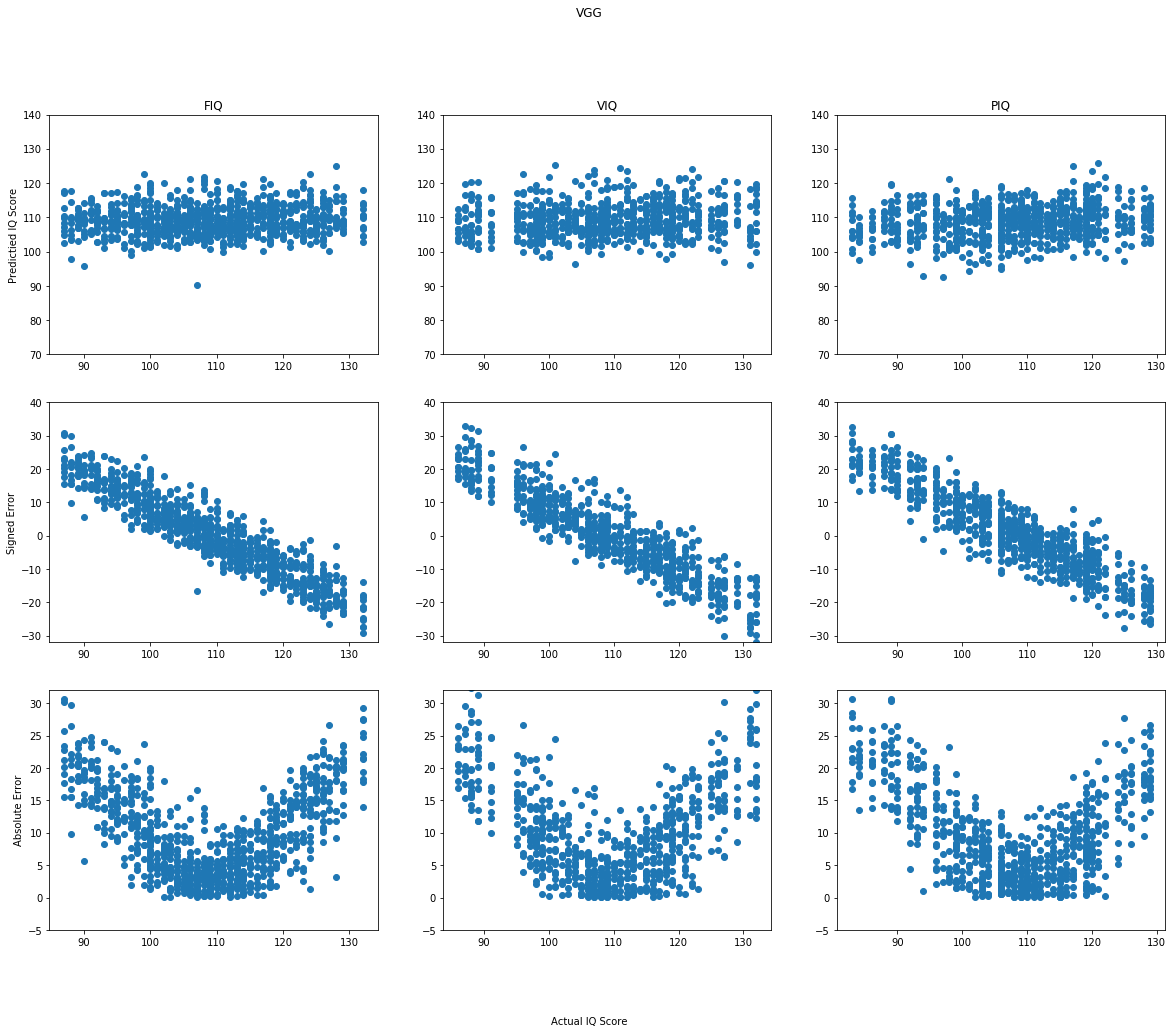

In [22]:
plt.clf()
fig2,ax2=plt.subplots(3,3,figsize=(20,15))
for j in range(0,3):
    val_preds2 = pd.concat(map(pd.read_csv,glob.glob(os.path.join(f"{RESULTS_DIR}/{job_ids[j]}/*.csv"))))
    ax2[0,j].set_title(titles[j])
    ax2[0,j].scatter(val_preds2["iq"],val_preds2["age_pred"])
    ax2[1,j].scatter(val_preds2["iq"],val_preds2["age_pred"]-val_preds2["iq"])
    ax2[1,j].set_ylim(-32,40)
    ax2[2,j].scatter(val_preds2["iq"],abs(val_preds2["age_pred"]-val_preds2["iq"]))
    ax2[2,j].set_ylim(-5,32)
ax2[0,0].set_ylim(70,140)
ax2[0,2].set_ylim(70,140)
ax2[0,1].set_ylim(70,140)

for axes, row in zip(ax2[:,0], ['Predictied IQ Score', 'Signed Error', 'Absolute Error'] ):
    axes.set_ylabel(row,size=10)

fig2.text(0.5, 0.04, 'Actual IQ Score', ha='center', va='center')
fig2.suptitle('VGG')
plt.savefig(os.path.join(FIGURES_DIR,f"3x3_vgg8_ravens_5fold_all.png"))  
plt.show()